# Problem statement

To predict the interest category deponding upon the features given.

# What is the use of predicting the interest_rate?
On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information.


# Data Taken to solve the problem
There are three category so basically a multi class classification problem. The dataset has 164309 rows and 14 columns. The attributes present in the column are :
1. Loan Id- The unique id given to each customer
2. Loan_amount_requested- The listed amount of the loan applied for by the borrower.
3. Length Employed-Employment length in years
4. home owner -	The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other.
5. income-verified-	Indicates if income was verified, not verified, or if the income source was verified.
6. Purpose_Of_Loan- A category provided by the borrower for the loan request. 
7. Debt_To_Income -A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
8. Inquiries_Last_6Mo- The number of inquiries by creditors during the past 6 months.
9. Months_Since_Deliquency- The number of months since the borrower's last delinquency.
10. Number_Open_Accounts -The number of open credit lines in the borrower's credit file.
11. Total_Accounts- The total number of credit lines currently in the borrower's credit file
12. Gender- Gender
13. Interest_Rate- Target Variable: Interest Rate category (1/2/3) of the loan application

# understanding and preparation of data



In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [126]:
train=pd.read_csv('C:/Users/HP-PC/Desktop/Analytics Vidya/Banking_competition/train_fNxu4vz.csv')
test=pd.read_csv('C:/Users/HP-PC/Desktop/Analytics Vidya/Banking_competition/test_fjtUOL8.csv')


In [3]:
train.head()



,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [401]:
test.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,accounts
0,27500,10,Mortgage,11.767575,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male,1.791759
1,26000,10,Others,11.608245,not verified,credit_card,11.37,0,0.0,6,23,Male,2.564949
2,6075,1,Rent,11.225257,VERIFIED - income,debt_consolidation,6.83,2,0.0,5,20,Male,1.609438
3,12000,10,Mortgage,11.198228,VERIFIED - income source,debt_consolidation,7.76,0,0.0,6,8,Male,1.945910
4,35000,1,Mortgage,11.957618,not verified,debt_consolidation,9.62,0,26.0,9,21,Male,2.484907


In [4]:
train.shape

(164309, 14)

In [5]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [8]:
test.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

1. There is missing values present in the dataset.


The missing values are present in the months_since_Deliquency,annual income ,home owner,length_emloyed.

In [47]:
#Loan_ID is dropped
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [48]:
data={'< 1 year':1, '4 years':4, '7 years':7, '8 years':8, '2 years':2,
       '10+ years':10, '1 year':1, '6 years':6, '9 years':9, '3 years':3,
       '5 years':5}

train['Length_Employed']=train['Length_Employed'].map(data)
train['Length_Employed']=train['Length_Employed'].fillna(0)
test['Length_Employed']=test['Length_Employed'].map(data)
test['Length_Employed']=test['Length_Employed'].fillna(0)


(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text xticklabel objects>)

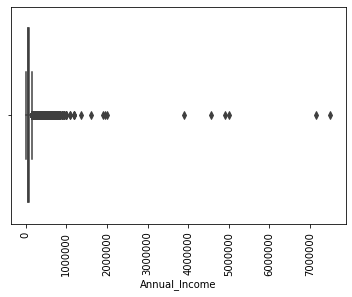

In [35]:
sns.boxplot(train['Annual_Income'])
plt.xticks(rotation=90)

In [36]:
 #since the outliers are present it has to be handled.
IQR = train.Annual_Income.quantile(0.75) - train.Annual_Income.quantile(0.25)

Lower_fence = train.Annual_Income.quantile(0.25) - (IQR * 1.5)
Upper_fence = train.Annual_Income.quantile(0.75) + (IQR * 1.5)  

In [37]:
# And if we are looking at really extreme values
# using the interquantile proximity rule

IQR = train.Annual_Income.quantile(0.75) - train.Annual_Income.quantile(0.25)

Lower_fence = train.Annual_Income.quantile(0.25) - (IQR * 3)
Upper_fence = train.Annual_Income.quantile(0.75) + (IQR * 3)

In [38]:
len(train[train['Annual_Income']>182200])

3314

In [39]:
len(test[test['Annual_Income']>182200])

2310

In [41]:
# when having more than 15 lakhs annual salary the requested amount is very less so it is may be by mistake they added an extra 00 
# so we will divide by 10 here
train['Annual_Income']=train.Annual_Income.mask(train['Annual_Income']>182200,train['Annual_Income']/100)
#test['Annual_Income']=test.Annual_Income.mask(test['Annual_Income']>182200,test['Annual_Income']/100)


In [50]:
#To deal with missing values
train['Annual_Income']=train['Annual_Income'].fillna(train['Annual_Income'].median())
test['Annual_Income']=test['Annual_Income'].fillna(test['Annual_Income'].median())
train['Months_Since_Deliquency']=train['Months_Since_Deliquency'].fillna(0)
test['Months_Since_Deliquency']=test['Months_Since_Deliquency'].fillna(0)
train['Length_Employed']=train['Length_Employed'].fillna(0)
test['Length_Employed']=test['Length_Employed'].fillna(0)
train['Home_Owner']=train['Home_Owner'].fillna('Other')
test['Home_Owner']=test['Home_Owner'].fillna('Other')

In [55]:
#train['Loan_Amount_Requested']=train['Loan_Amount_Requested'].str.replace(",","").astype(int)
#test['Loan_Amount_Requested']=test['Loan_Amount_Requested'].str.replace(",","").astype(int)
test['Home_Owner']=test['Home_Owner'].replace('None','Other')
train['Home_Owner']=train['Home_Owner'].replace('None','Other')


In [52]:
train.isnull().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

# Data Visualization

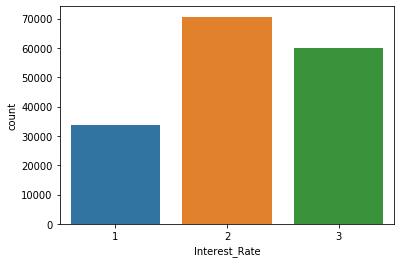

In [53]:
#the total count of each interest category
sns.countplot(train['Interest_Rate'])#There is less number of people belonging to category-1 than  and 3

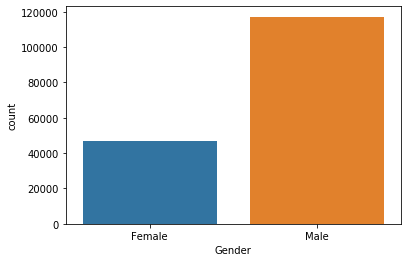

In [405]:
sns.countplot(train['Gender'])

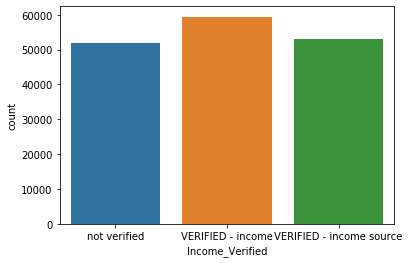

In [29]:
sns.countplot(train['Income_Verified'])

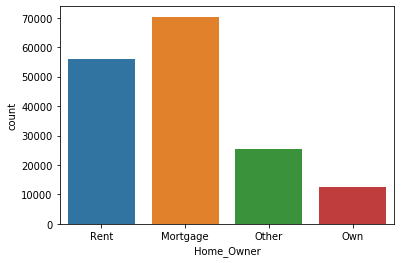

In [56]:
sns.countplot(train['Home_Owner'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

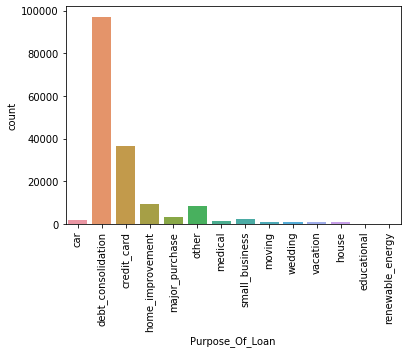

In [63]:
sns.countplot(dataset['Purpose_Of_Loan'])
plt.xticks(rotation=90)

In [58]:
#to convert to numerical value
train['Gender']=pd.get_dummies(train['Gender'],drop_first=True)
test['Gender']=pd.get_dummies(test['Gender'],drop_first=True)

In [59]:
data=pd.get_dummies(train['Income_Verified'],drop_first=True)
train['Income_verified']=data['VERIFIED - income source']
train['not_verified']=data['not verified']
data=pd.get_dummies(test['Income_Verified'],drop_first=True)
test['Income_verified']=data['VERIFIED - income source']
test['not_verified']=data['not verified']

In [61]:
data_H=pd.get_dummies(train['Home_Owner'],drop_first=True)
train['other']=data_H['Other']
train['Own']=data_H['Own']
train['Rent']=data_H['Rent']
data_H=pd.get_dummies(test['Home_Owner'],drop_first=True)
test['other']=data_H['Other']
test['Own']=data_H['Own']
test['Rent']=data_H['Rent']

In [66]:
data_H=pd.get_dummies(train['Purpose_Of_Loan'])
train['dept_consolidation']=data_H['debt_consolidation']
data_H=pd.get_dummies(test['Purpose_Of_Loan'])
test['debt_consolidation']=data_H['debt_consolidation']

# Correlation

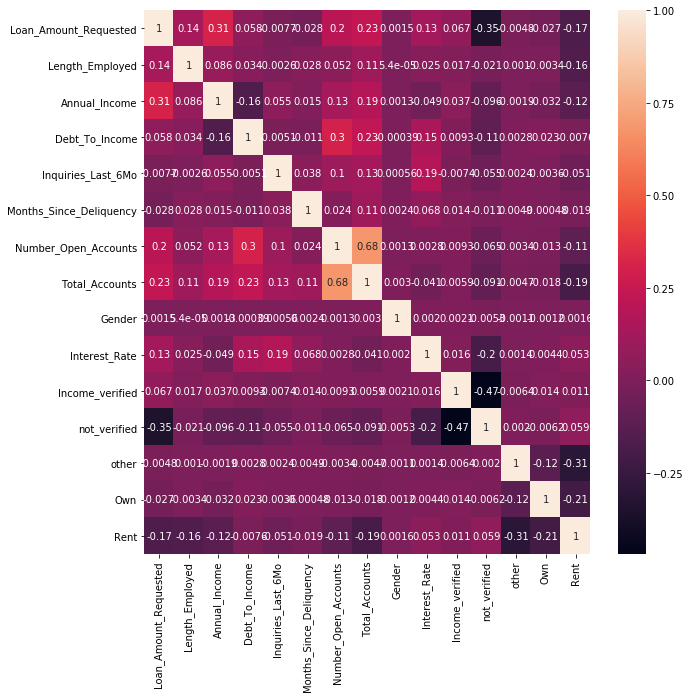

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [67]:
train.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate', 'Income_verified',
       'not_verified', 'other', 'Own', 'Rent', 'dept_consolidation'],
      dtype='object')

In [79]:
x=train.drop(['Home_Owner','Purpose_Of_Loan','Income_Verified','Interest_Rate'],axis=1)
test_x=test.drop(['Home_Owner','Purpose_Of_Loan','Income_Verified'],axis=1)

In [80]:
x.shape

(164309, 15)

In [81]:
y=train['Interest_Rate']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [313]:
y_train.shape

(131447,)

# using Random Forest Classifier

In [84]:

model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

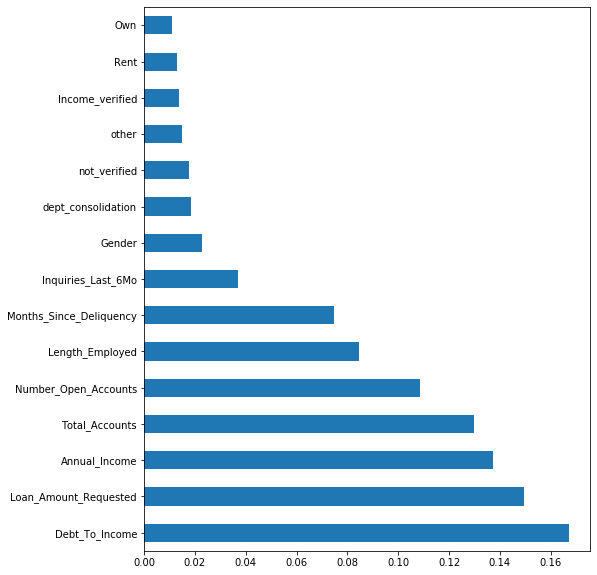

In [100]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

# using catboost with K-Fold

In [101]:
from catboost import CatBoostClassifier

In [127]:
# Convert to numeric
train["Loan_Amount_Requested"] = train["Loan_Amount_Requested"].str.replace(",", "")
train["Loan_Amount_Requested"] = pd.to_numeric(train["Loan_Amount_Requested"])
test["Loan_Amount_Requested"] = test["Loan_Amount_Requested"].str.replace(",", "")
test["Loan_Amount_Requested"] = pd.to_numeric(test["Loan_Amount_Requested"])

# Fill NaN
train["Length_Employed"].fillna('NaN', inplace=True)
test["Length_Employed"].fillna('NaN', inplace=True)

train["Home_Owner"].fillna('NaN', inplace=True)
test["Home_Owner"].fillna('NaN', inplace=True)

train["Income_Verified"].fillna('NaN', inplace=True)
test["Income_Verified"].fillna('NaN', inplace=True)

train["Purpose_Of_Loan"].fillna('NaN', inplace=True)
test["Purpose_Of_Loan"].fillna('NaN', inplace=True)

train["Gender"].fillna('NaN', inplace=True)
test["Gender"].fillna('NaN', inplace=True)

# Drop loan ids
train = train.drop(["Loan_ID"], axis=1)
test = test.drop(["Loan_ID"], axis=1)

# Fill NaN with mean
train["Annual_Income"].fillna(train["Annual_Income"].median(), inplace=True)
test["Annual_Income"].fillna(test["Annual_Income"].mean(), inplace=True)

# Assumption: If it is NaN, then user has no deliquency, so set with 0
train["Months_Since_Deliquency"].fillna(0, inplace=True)
test["Months_Since_Deliquency"].fillna(0, inplace=True)
# when having more than 15 lakhs annual salary the requested amount is very less so it is may be by mistake they added an extra 00 
# so we will divide by 10 here
train['Annual_Income']=train.Annual_Income.mask(train['Annual_Income']>182200,train['Annual_Income']/100)
test['Annual_Income']=test.Annual_Income.mask(test['Annual_Income']>182200,test['Annual_Income']/100)

In [119]:
categorical_var = np.where(train_x.dtypes == np.object)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 1  2  4  5 11]


In [118]:
#training
train_x = train.drop(columns=['Interest_Rate'],axis=1)
train_y = train['Interest_Rate']

In [124]:
#using k-fold
train_=train_x.values
from sklearn.model_selection import KFold,StratifiedKFold
skf,scores=KFold(n_splits=5,  random_state=None,shuffle=True),list()
for train_index,test_index in skf.split(train_):
    X_train, X_test = train_[train_index],train_[test_index] 
    y_train, y_test = train_y[train_index], train_y[test_index]
    model = CatBoostClassifier(n_estimators=1000,  learning_rate=0.1,verbose=500)
    model.fit( X_train, y_train, eval_set=(X_test, y_test),cat_features=categorical_var)
    preds=model.predict(X_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))
    

0:	learn: 1.0797240	test: 1.0796753	best: 1.0796753 (0)	total: 392ms	remaining: 6m 31s
500:	learn: 0.8975051	test: 0.9190597	best: 0.9190364 (487)	total: 2m 46s	remaining: 2m 45s
999:	learn: 0.8748426	test: 0.9177973	best: 0.9176635 (860)	total: 5m 21s	remaining: 0us

bestTest = 0.9176635036
bestIteration = 860

Shrink model to first 861 iterations.
0.5346430580318727
0:	learn: 1.0796244	test: 1.0796677	best: 1.0796677 (0)	total: 339ms	remaining: 5m 38s
500:	learn: 0.8973380	test: 0.9171945	best: 0.9171213 (484)	total: 2m 33s	remaining: 2m 32s
999:	learn: 0.8760659	test: 0.9164512	best: 0.9161904 (899)	total: 5m 12s	remaining: 0us

bestTest = 0.9161904255
bestIteration = 899

Shrink model to first 900 iterations.
0.5358705962858786
0:	learn: 1.0797001	test: 1.0797386	best: 1.0797386 (0)	total: 344ms	remaining: 5m 43s
500:	learn: 0.8966491	test: 0.9199320	best: 0.9199093 (489)	total: 2m 34s	remaining: 2m 33s
999:	learn: 0.8753355	test: 0.9192862	best: 0.9191578 (936)	total: 5m 10s	remai

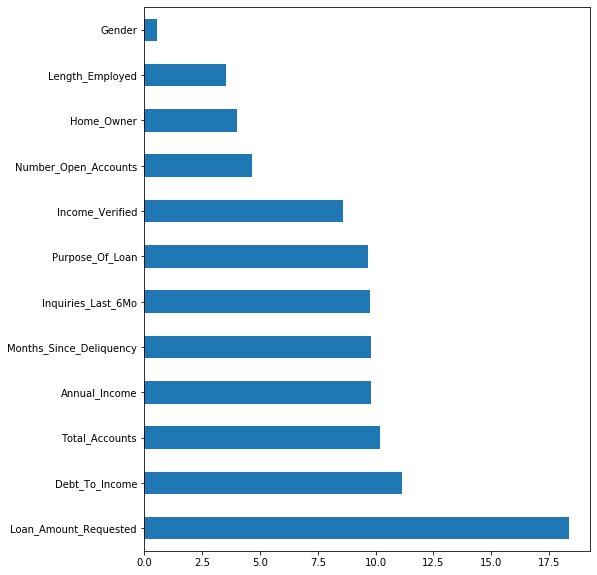

In [131]:
feat_imp = pd.Series(model.feature_importances_, index=train_x.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [128]:
preds=model.predict(test)

In [92]:
submission_random_forest=pd.read_csv('C:/Users/HP-PC/Desktop/Analytics Vidya/Banking_competition/sample_submission_HSqiq1Q.csv')

In [129]:
submission_random_forest['Interest_Rate']=preds

In [130]:
submission_random_forest.to_csv('subs2.csv',index=False)

In [ ]:
#Got a rank of 72